# Introduction to Plotting

- Operating system interaction: `os`
- File manipulation: `os.path`
- Arrays, record arrays and basic statistics: `numpy`
- Simple Plotting: `matplotlib`


## Shell commands

In [1]:
# to call shell from IPython is to prepend an exclamation point to a shell command:
!pwd

/Users/rhf/git/IPythonNotebookTutorial


In [2]:
!ls

1.0_jupyter_dashboard.ipynb        4 - 2D Imaging.ipynb
1.1_jupyter_not_a_book.ipynb       Data
1.2_markdown_syntax.ipynb          Gaussian Fitting.ipynb
2 - Introduction to Plotting.ipynb Introduction.ipynb
3 - Multiple plots - Glob.ipynb    README.md


In [3]:
# Data files
!ls Data/Glob

f1.txt f2.txt f3.txt f4.txt f5.txt f6.txt f7.txt f8.txt f9.txt


## Python `OS` module

In [4]:
# The same is possible with python
import os

os.getcwd()

'/Users/rhf/git/IPythonNotebookTutorial'

In [5]:
# Note the output is a list!
os.listdir()

['Introduction.ipynb',
 '4 - 2D Imaging.ipynb',
 '1.1_jupyter_not_a_book.ipynb',
 '3 - Multiple plots - Glob.ipynb',
 'README.md',
 '.gitignore',
 '1.2_markdown_syntax.ipynb',
 '2 - Introduction to Plotting.ipynb',
 '.ipynb_checkpoints',
 'Gaussian Fitting.ipynb',
 '.git',
 '1.0_jupyter_dashboard.ipynb',
 'Data',
 '.gitignore~']

In [6]:
os.listdir("Data/Glob")

['f6.txt',
 'f7.txt',
 'f5.txt',
 'f4.txt',
 'f1.txt',
 'f3.txt',
 'f2.txt',
 'f9.txt',
 'f8.txt']

## File Manipulation: `os.path` module

In [7]:
# Let's pick one file
file_path = "Data/Glob/f1.txt"

In [8]:
import os.path
os.path.exists(file_path)

True

In [9]:
# show what is available in os.path
dir(os.path)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_get_sep',
 '_joinrealpath',
 '_varprog',
 '_varprogb',
 'abspath',
 'altsep',
 'basename',
 'commonpath',
 'commonprefix',
 'curdir',
 'defpath',
 'devnull',
 'dirname',
 'exists',
 'expanduser',
 'expandvars',
 'extsep',
 'genericpath',
 'getatime',
 'getctime',
 'getmtime',
 'getsize',
 'isabs',
 'isdir',
 'isfile',
 'islink',
 'ismount',
 'join',
 'lexists',
 'normcase',
 'normpath',
 'os',
 'pardir',
 'pathsep',
 'realpath',
 'relpath',
 'samefile',
 'sameopenfile',
 'samestat',
 'sep',
 'split',
 'splitdrive',
 'splitext',
 'stat',
 'supports_unicode_filenames',
 'sys']

### Exercise

1. Get only the file name of file_path
2. Get the full path of file_path
3. Get the directory where the file_path is
4. Absolute directory where file_path is

In [10]:
# 1. File name
os.path.basename(file_path)

'f1.txt'

In [11]:
# 2. Full path
os.path.abspath(file_path)

'/Users/rhf/git/IPythonNotebookTutorial/Data/Glob/f1.txt'

In [12]:
# 3. Directory where the file is
os.path.dirname(file_path)

'Data/Glob'

In [13]:
# 4. Absolute directory where the file is
os.path.dirname(
    os.path.abspath(file_path)
)

'/Users/rhf/git/IPythonNotebookTutorial/Data/Glob'

How to get the **file extension**:

In [14]:
prefix, suffix = os.path.splitext(file_path)
print("prefix = {}; suffix = {}; suffix without '.' = {}.".format(prefix, suffix, suffix[1:]))

prefix = Data/Glob/f1; suffix = .txt; suffix without '.' = txt.


In [15]:
# Extension
filename_only = os.path.basename(file_path)
print(filename_only)
print(filename_only.split("."))
print(filename_only.split(".")[-1])


f1.txt
['f1', 'txt']
txt


# Numpy Arrays

In [16]:
# Let's get back to our file
!head Data/Glob/f1.txt

# X , Y , E , DX
1
0.00232478,8.22832,0.677097,0.0020133
0.00458718,5.8915,0.193922,0.00192328
0.00684958,12.573,0.413909,0.00189569
0.00911198,37.3161,0.768022,0.00199785
0.0113744,156.672,2.59008,0.00205609
0.0136368,567.555,11.7842,0.00217489
0.0158992,1401.89,16.1017,0.00229348
0.0181616,1334.2,13.4719,0.00239931


**The file has:**
- header: `x`, `y`, `Err(y)`, `Err(x)`
        - This a 1D SANS I(Q) curve output by Mantid.
- Two rows header


### Reading `csv` files as `numpy` arrays

In [17]:
# see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.genfromtxt.html
import numpy as np
data = np.genfromtxt(
    file_path,
    delimiter=",",
    skip_header=2,
    names=['X', 'Y', 'E', 'DX'],
)

# Data is a structure array
data

array([(0.00232478, 8.22832e+00, 6.77097e-01, 0.0020133 ),
       (0.00458718, 5.89150e+00, 1.93922e-01, 0.00192328),
       (0.00684958, 1.25730e+01, 4.13909e-01, 0.00189569),
       (0.00911198, 3.73161e+01, 7.68022e-01, 0.00199785),
       (0.0113744 , 1.56672e+02, 2.59008e+00, 0.00205609),
       (0.0136368 , 5.67555e+02, 1.17842e+01, 0.00217489),
       (0.0158992 , 1.40189e+03, 1.61017e+01, 0.00229348),
       (0.0181616 , 1.33420e+03, 1.34719e+01, 0.00239931),
       (0.020424  , 1.62173e+03, 2.00042e+01, 0.00247893),
       (0.0226864 , 1.40312e+03, 1.01434e+01, 0.00256543),
       (0.0249488 , 1.30591e+03, 1.03458e+01, 0.00260186),
       (0.0272112 , 7.52002e+02, 6.22791e+00, 0.00263457),
       (0.0294736 , 5.86367e+02, 3.34320e+00, 0.00269503),
       (0.031736  , 4.63746e+02, 2.83678e+00, 0.00273969),
       (0.0339984 , 2.82236e+02, 1.72425e+00, 0.0027873 ),
       (0.0362608 , 2.52291e+02, 1.15568e+00, 0.00285656),
       (0.0385232 , 1.94139e+02, 1.03233e+00, 0.00290755

In [18]:
# Attribute indexing
data.dtype

dtype([('X', '<f8'), ('Y', '<f8'), ('E', '<f8'), ('DX', '<f8')])

In [19]:
# X is a column in the file
data['X']

array([0.00232478, 0.00458718, 0.00684958, 0.00911198, 0.0113744 ,
       0.0136368 , 0.0158992 , 0.0181616 , 0.020424  , 0.0226864 ,
       0.0249488 , 0.0272112 , 0.0294736 , 0.031736  , 0.0339984 ,
       0.0362608 , 0.0385232 , 0.0407856 , 0.043048  , 0.0453104 ,
       0.0475728 , 0.0498352 , 0.0520976 , 0.05436   , 0.0566224 ,
       0.0588848 , 0.0611472 , 0.0634096 , 0.065672  , 0.0679344 ,
       0.0701968 , 0.0724592 , 0.0747216 , 0.076984  , 0.0792464 ,
       0.0815088 , 0.0837712 , 0.0860336 , 0.088296  , 0.0905584 ,
       0.0928208 , 0.0950832 , 0.0973456 , 0.099608  , 0.10187   ,
       0.104133  , 0.106395  , 0.108658  , 0.11092   , 0.113182  ,
       0.115445  , 0.117707  , 0.11997   , 0.122232  , 0.124494  ,
       0.126757  , 0.129019  , 0.131282  , 0.133544  , 0.135806  ,
       0.138069  , 0.140331  , 0.142594  , 0.144856  , 0.147118  ,
       0.149381  , 0.151643  , 0.153906  , 0.156168  , 0.15843   ,
       0.160693  , 0.162955  , 0.165218  , 0.16748   , 0.16974

In [20]:
arr = data['X']
arr.dtype

dtype('float64')

In [21]:
arr.shape

(200,)

## Array indexing

In [22]:
arr[0]

0.00232478

In [23]:
arr[-1]

0.452542

In [24]:
arr[20:25]

array([0.0475728, 0.0498352, 0.0520976, 0.05436  , 0.0566224])

## Array Methods

In [25]:
dir(arr)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e

### Exercise: get some basic statistics given the methods available in the `numpy` array

In [26]:
print("Max = {:.2}, Min = {:.2}, Average = {:.2}, Std Dev = {:.2}".format(
    arr.max(),
    arr.min(),
    arr.mean(),
    arr.std(),
))

Max = 0.45, Min = 0.0023, Average = 0.23, Std Dev = 0.13


In [27]:
# Normalisation to 1
arr_norm = (arr-arr.min())/(arr.max()-arr.min())

print("Max = {:.2}, Min = {:.2}, Average = {:.2}, Std Dev = {:.2}".format(
    arr_norm.max(),
    arr_norm.min(),
    arr_norm.mean(),
    arr_norm.std(),
))

Max = 1.0, Min = 0.0, Average = 0.5, Std Dev = 0.29


# Plotting

In [28]:
# Choose your backend (the way the plots are rendered in a notebook)
%matplotlib notebook

# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt

# Choose the default figure size
# plt.rcParams["figure.figsize"] = (12,8)

<IPython.core.display.Javascript object>


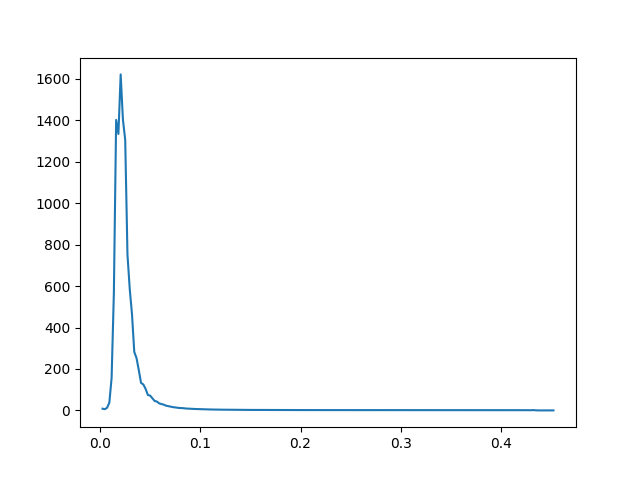

In [29]:
# Simple case
fig, ax = plt.subplots()
ax.plot(data['X'], data['Y'])

<IPython.core.display.Javascript object>


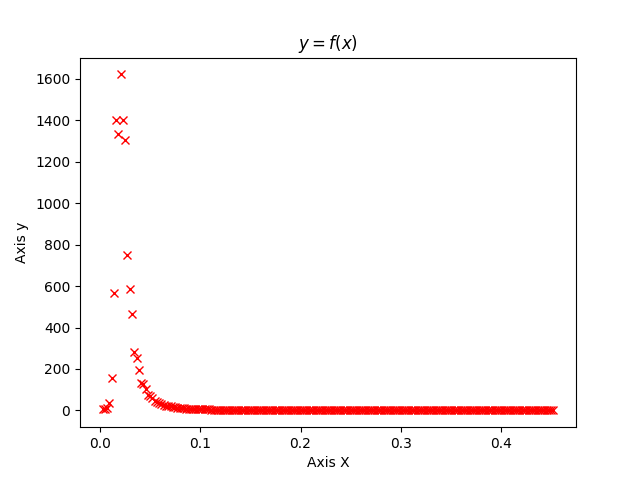

In [30]:
# Let's label some stuff
# Simple Labels. Part 3 introduces axes manipulation
fig, ax = plt.subplots()
ax.set_title("$y = f(x)$")
ax.set_xlabel("Axis X")
ax.set_ylabel("Axis y")
# Marker symbols: https://matplotlib.org/api/markers_api.html
ax.plot(data['X'], data['Y'], marker='x', color='red', linestyle='')


<IPython.core.display.Javascript object>


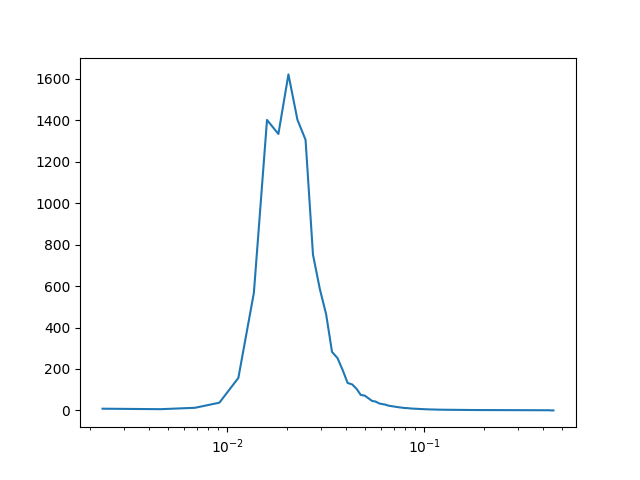

In [31]:
# Log x
fig, ax = plt.subplots()
ax.semilogx(data['X'], data['Y'])

<IPython.core.display.Javascript object>


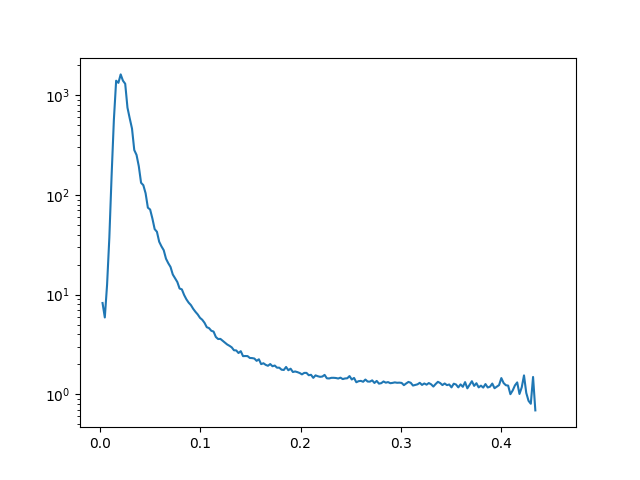

In [32]:
# Log y
fig, ax = plt.subplots()
ax.semilogy(data['X'], data['Y'])

<IPython.core.display.Javascript object>


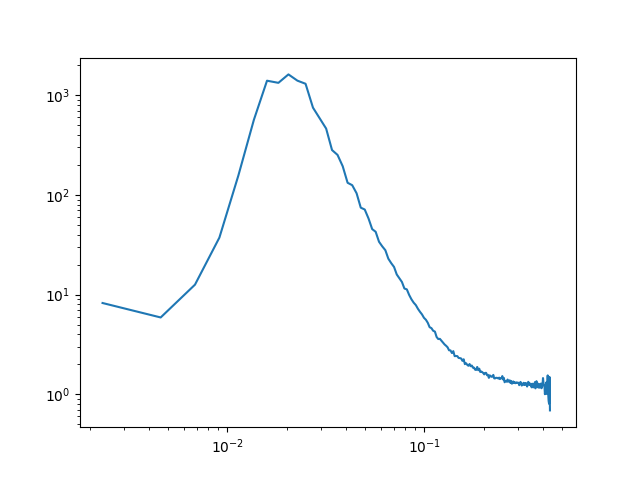

In [33]:
# Log X and Log Y
fig, ax = plt.subplots()
ax.loglog(data['X'], data['Y'])

<IPython.core.display.Javascript object>


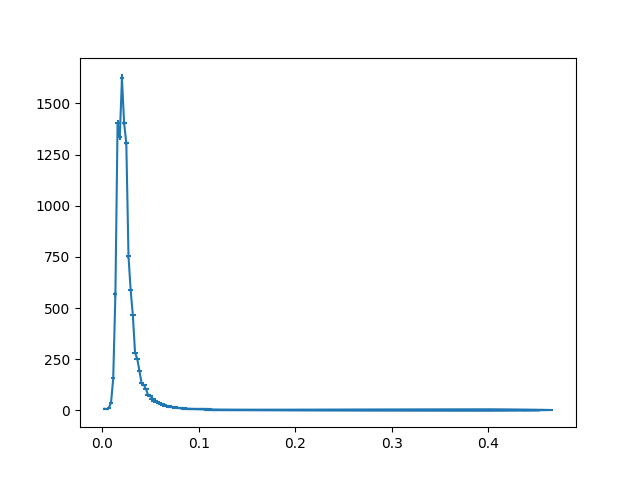

<Container object of 3 artists>

In [34]:
## Error bars linear
fig, ax = plt.subplots()
ax.errorbar(data['X'], data['Y'], xerr=data['DX'], yerr=data['E'])

<IPython.core.display.Javascript object>


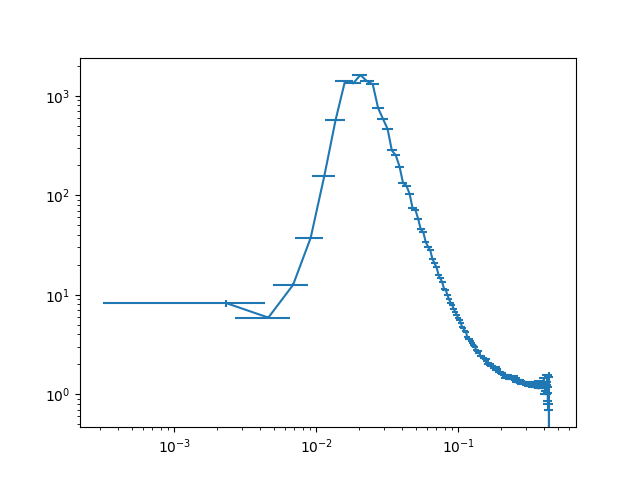

In [35]:
## Error bars Lox Log y
fig, ax = plt.subplots()
ax.errorbar(data['X'], data['Y'], xerr=data['DX'], yerr=data['E'])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

<IPython.core.display.Javascript object>


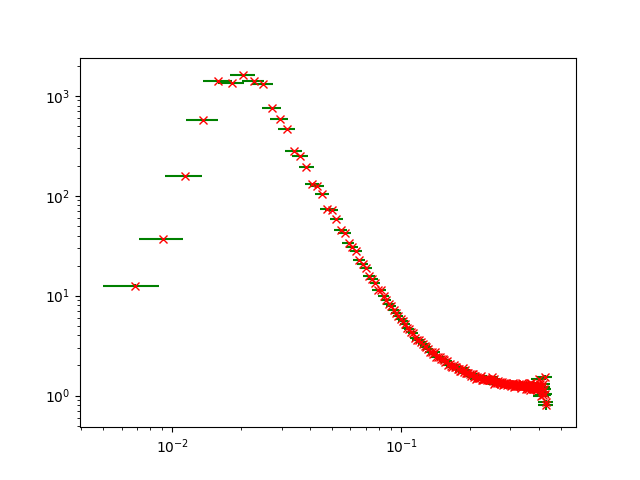

In [36]:
# Same plot but let's prone some sata
fig, ax = plt.subplots()
ax.errorbar(
    data['X'][2:-10],
    data['Y'][2:-10],
    xerr=data['DX'][2:-10],
    yerr=data['E'][2:-10],
    # fmt = plot format string: '[color][marker][line]'
    # See Notes here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    fmt='rx',
    ecolor='green',
    capthick=2,
)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


### Create a new `CSV` file

In [37]:
# Imagine that you want to create a new plot using the same X coordinate
y_new = np.exp(data['X']*10)
y_new

array([ 1.02352014,  1.04694018,  1.07089613,  1.09540023,  1.12046525,
        1.14610358,  1.17232857,  1.19915363,  1.2265925 ,  1.25465922,
        1.28336816,  1.31273402,  1.34277182,  1.37349694,  1.40492511,
        1.43707242,  1.46995531,  1.50359063,  1.53799558,  1.57318779,
        1.60918526,  1.64600642,  1.68367011,  1.72219562,  1.76160267,
        1.80191142,  1.84314251,  1.88531704,  1.92845661,  1.97258329,
        2.01771968,  2.06388886,  2.11111449,  2.15942072,  2.20883229,
        2.25937449,  2.31107319,  2.36395485,  2.41804654,  2.47337595,
        2.5299714 ,  2.58786186,  2.64707697,  2.70764702,  2.76959195,
        2.83298238,  2.8977947 ,  2.96411943,  3.03193188,  3.10129573,
        3.17227818,  3.24485284,  3.31912104,  3.39505513,  3.47272643,
        3.5522102 ,  3.63347685,  3.71663987,  3.80166831,  3.88864201,
        3.97764526,  4.06864492,  4.16176807,  4.25698005,  4.35437027,
        4.4540331 ,  4.55593145,  4.66020762,  4.76682278,  4.87

In [38]:
# Note the size of the X and Y arrays
data['X'].size == y_new.size

True

<IPython.core.display.Javascript object>


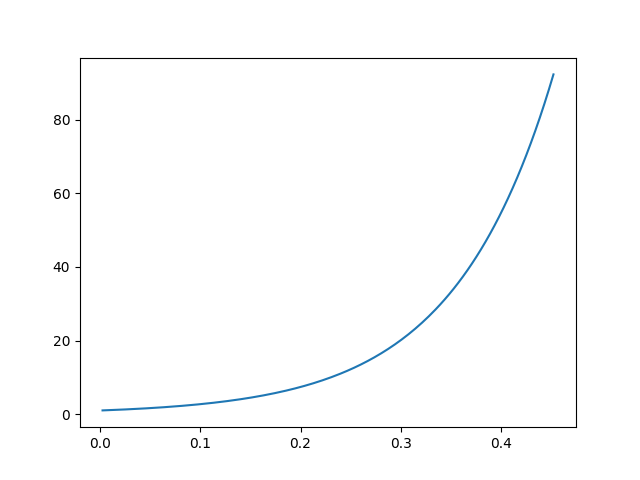

In [39]:
fig, ax = plt.subplots()
ax.plot(data['X'], y_new)

### Adding the new array to the dataset

In [40]:
# Adding y_new to the file??
from numpy.lib import recfunctions
data_new = recfunctions.append_fields(data, 'new', y_new)
data_new.dtype.names

('X', 'Y', 'E', 'DX', 'new')

In [41]:
'''
Remember the original file header:

# X , Y , E , DX
1

'''

header = data_new.dtype.names
header_str = " , ".join(header)
header_str

'X , Y , E , DX , new'

In [42]:
header_str = "# " + header_str + "\n1"
print(header_str)

# X , Y , E , DX , new
1


In [43]:
np.savetxt(
    "/tmp/foo.txt",
    data_new,
    delimiter=",",
    fmt='%.2f',
    header=header_str,
    comments='',
)

In [44]:
!head /tmp/foo.txt

# X , Y , E , DX , new
1
0.00,8.23,0.68,0.00,1.02
0.00,5.89,0.19,0.00,1.05
0.01,12.57,0.41,0.00,1.07
0.01,37.32,0.77,0.00,1.10
0.01,156.67,2.59,0.00,1.12
0.01,567.55,11.78,0.00,1.15
0.02,1401.89,16.10,0.00,1.17
0.02,1334.20,13.47,0.00,1.20


# Advanced Plotting

<IPython.core.display.Javascript object>


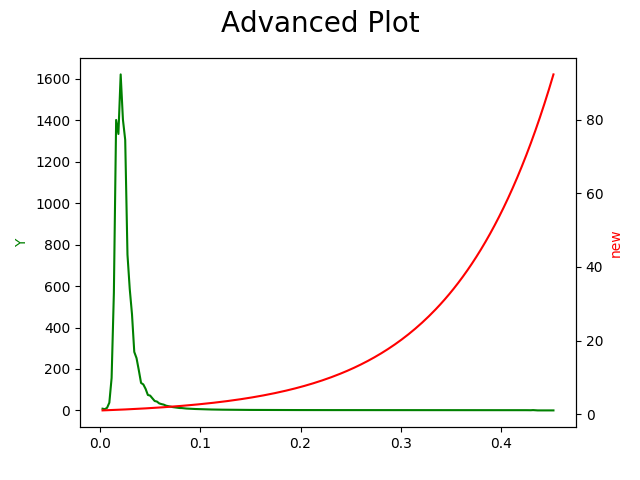

Text(0.5,0.98,'Advanced Plot')

In [45]:
fig, ax1 = plt.subplots()  # create figure and axes
ax1.plot(data_new['X'], data_new['Y'], color='green')
ax1.set_ylabel('Y', color='green')

ax2 = ax1.twinx()
ax2.plot(data_new['X'], data_new['new'], color='red')
ax2.set_ylabel('new', color='red')

fig.suptitle('Advanced Plot', fontsize=20)

<IPython.core.display.Javascript object>


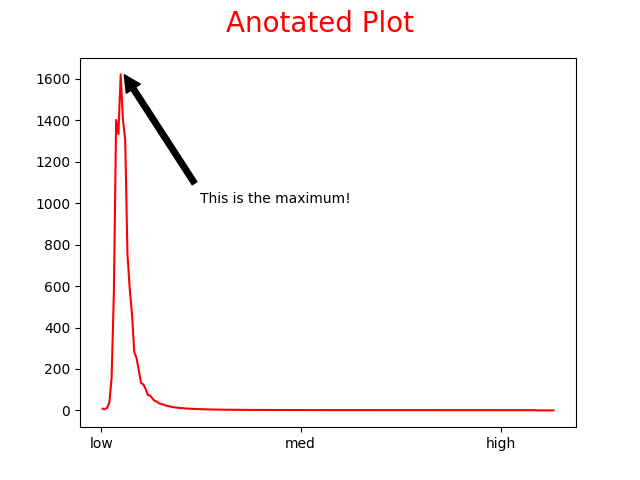

Text(0.5,0.98,'Anotated Plot')

In [46]:
fig, ax = plt.subplots()  # create figure and axes
ax.plot(data_new['X'], data_new['Y'], color='red')
ax.set_xticks([0.001, 0.2, 0.4])
ax.set_xticklabels(['low', 'med', 'high'])
# https://matplotlib.org/users/annotations.html
ax.annotate(
    'This is the maximum!', 
    xy=(0.02, 1650), # Coordinate where the head is 
    xytext=(0.1, 1000), # Coordinate where the text starts
    arrowprops=dict(facecolor='black', shrink=0.05),
)
fig.suptitle('Anotated Plot', fontsize=20, color='red')

In [47]:
# The dict above returns a dictionary
dict(facecolor='black', shrink=0.05)

{'facecolor': 'black', 'shrink': 0.05}